In [80]:
import pandas as pd
import seaborn as sns 
import matplotlib as plt 

import warnings
warnings.filterwarnings('ignore')

In [81]:

df = pd.read_csv('./data/train.csv')
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [82]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
[font for font in font_list if font.startswith('Ma')]

['Magic R', 'Malgun Gothic', 'Malgun Gothic', 'Malgun Gothic']

<Axes: xlabel='대출등급', ylabel='count'>

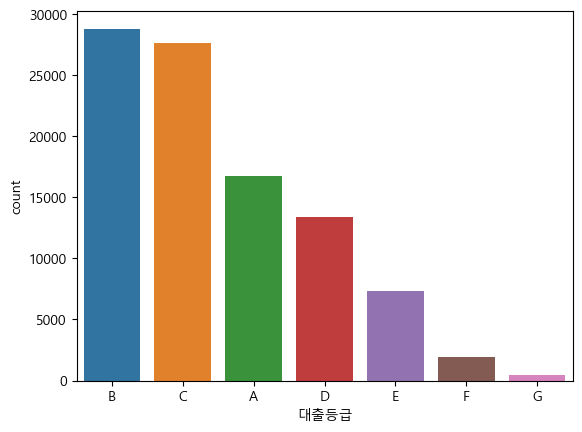

In [83]:
import seaborn as sns 
import matplotlib as plt 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
target = pd.DataFrame(df.대출등급.value_counts())
target
sns.barplot(data = target , x=target.index, y='count' )

### 연속형변수

In [84]:
df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


<Axes: >

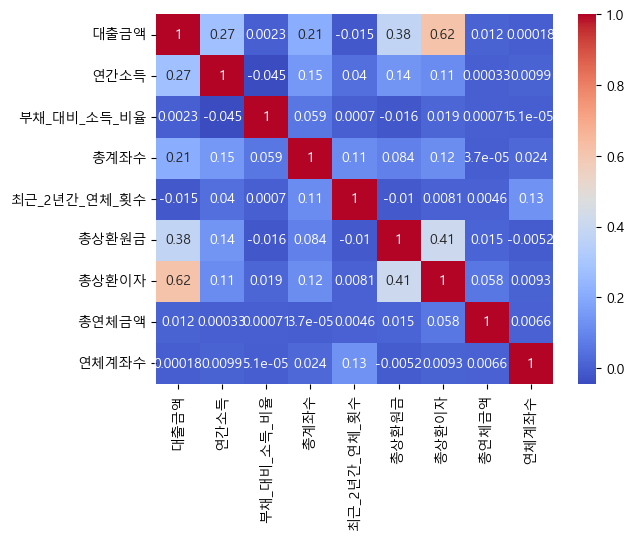

In [85]:
df_corr = df[['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']].corr()
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

#### 대출금액

- 등급이 낮을수록 대출금액이 늘고있는 경향

<Axes: xlabel='대출등급', ylabel='대출금액'>

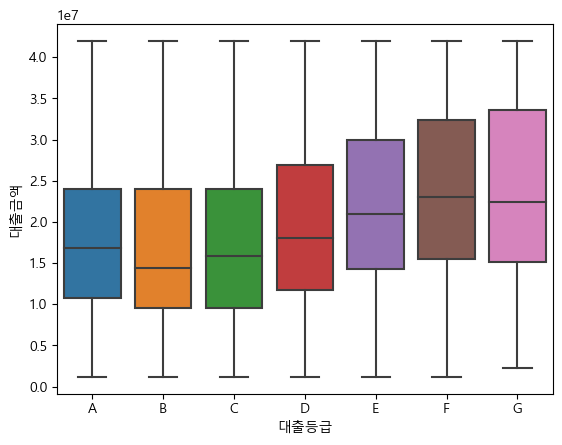

In [95]:
order = sorted(df['대출등급'].unique())
sns.boxplot(data = df, x ='대출등급', y = '대출금액', order=order)

#### 연간소득

- standardscale 해도 변화 업음 
- 이상치를 제거해야할 듯 
- 대체로 등급이 낮을수록 연간소득이 낮은 경향이 나타남 

<Axes: xlabel='대출등급', ylabel='연간소득'>

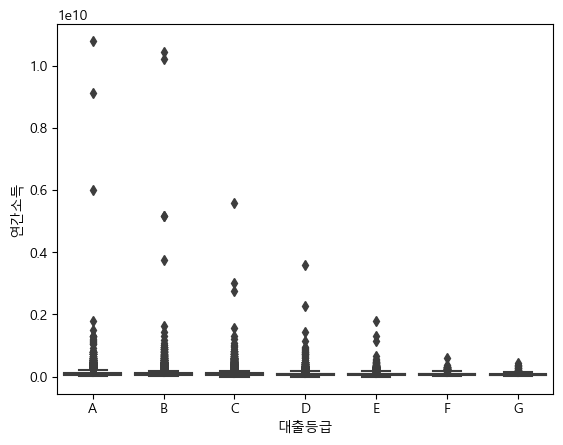

In [94]:
order = sorted(df['대출등급'].unique())
sns.boxplot(data = df, x ='대출등급', y = '연간소득', order=order) # 정규화 필요할 듯 

<Axes: xlabel='대출등급', ylabel='연간소득_scaled'>

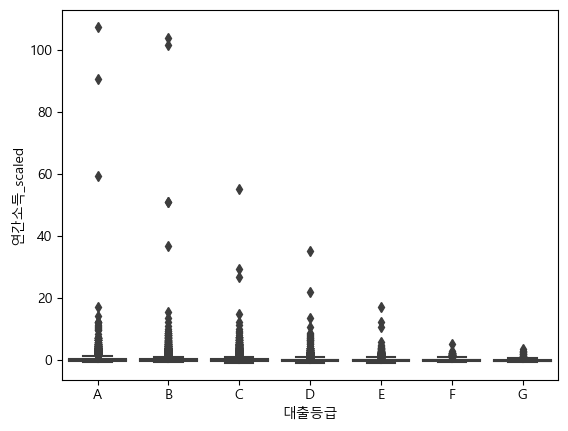

In [98]:
## 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['연간소득_scaled'] = scaler.fit_transform(df[['연간소득']].values)
order = sorted(df['대출등급'].unique())
sns.boxplot(data = df, x ='대출등급', y = '연간소득_scaled', order=order) # 정규화해도 별차이없음 ..

In [106]:
## 이상치제거 
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 3 * IQR
    upper = Q1 + 3 * IQR

    target = df[(df[col] >= lower) & (df[col] <= upper)]
    return target
target = remove_outliers('연간소득')

<Axes: xlabel='대출등급', ylabel='연간소득'>

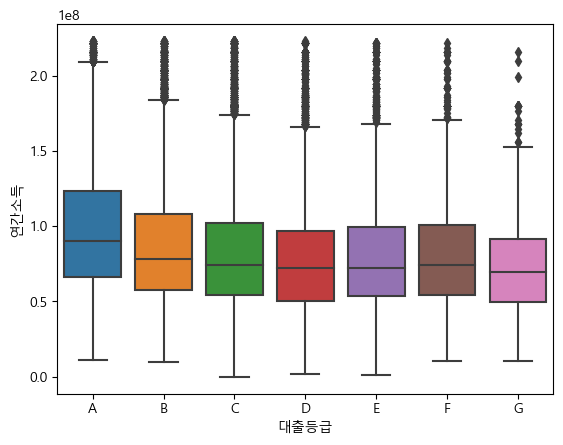

In [107]:
sns.boxplot(data = target, x ='대출등급', y = '연간소득', order=order)

In [97]:
target = df[~(df.연간소득 < 600)]
target.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,연간소득_scaled
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,-0.220218
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.370332
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0.020823
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0.382384
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,-0.222870


In [67]:
target = df[~(df.부채_대비_소득_비율 > 600)]
target.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,연간소득_scaled
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,-0.220218
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.370332
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0.020823
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0.382384
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,-0.222870


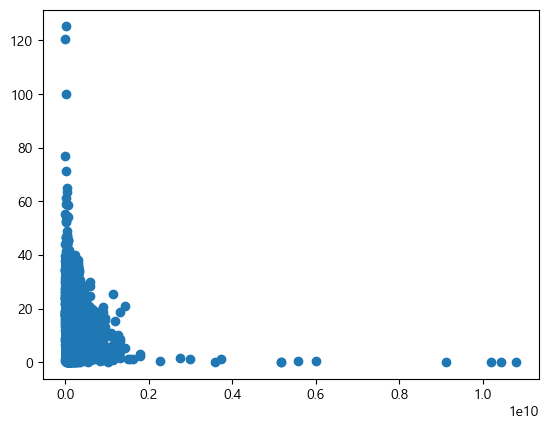

In [71]:
import matplotlib.pyplot as plt

plt.scatter(target['연간소득'], target['부채_대비_소득_비율'])

<Axes: xlabel='대출등급', ylabel='부채_대비_소득_비율'>

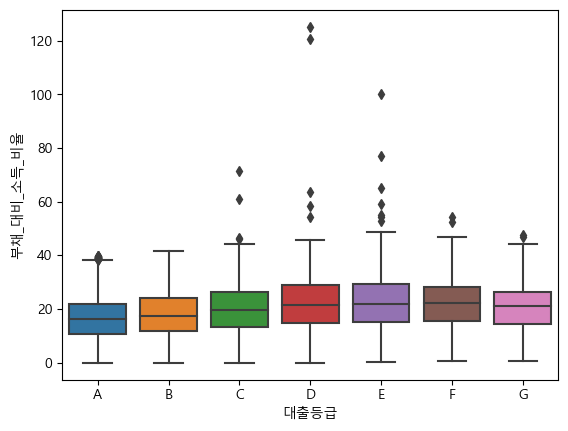

In [77]:
order = sorted(target['대출등급'].unique())
# C 그룹에 이상치 있는 것 같음 
sns.boxplot(data = target, x ='대출등급', y = '부채_대비_소득_비율', order=order)  # C 그룹에 이상치 있는 것 같음 